In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
import numpy as np

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

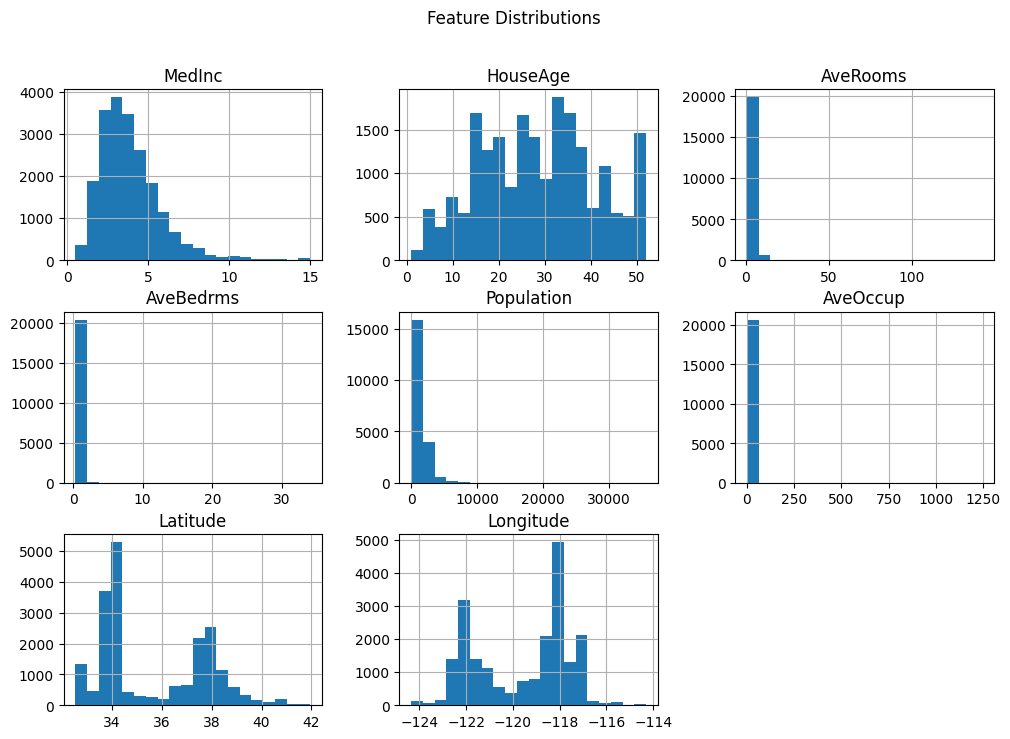

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

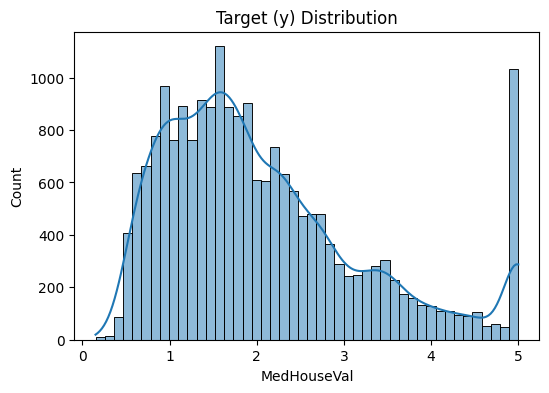

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

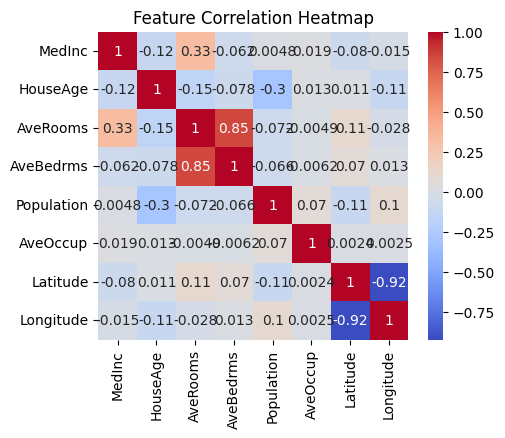

In [7]:
plt.figure(figsize=(5, 4))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
X = X.values.astype(float)
y = np.array(y).reshape(-1)

In [9]:
ndpost=1000
nskip=1000
n_trees=5

In [10]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=10, n_chains=4, ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  2.065325                 2.414158             3.496603   
1                  2.233238                 2.330844             1.416520   
2                  2.219274                 1.874835             2.265772   
3                  2.142421                 2.466160             2.817035   
4                  2.400977                 1.851603             2.878617   
5                  2.129271                 1.888647             2.566312   
6                  1.720836                 2.158042             1.732406   
7                  1.984854                 2.507294             2.825773   
8                  2.026884                 1.866426             2.039647   
9                  1.811081                 2.082971             2.824170   
mean               2.073416                 2.144098             2.486285   
std                0.201440              

In [11]:
rhat_df.to_csv("results/real3_CalHousing_rhat.csv", index=False)

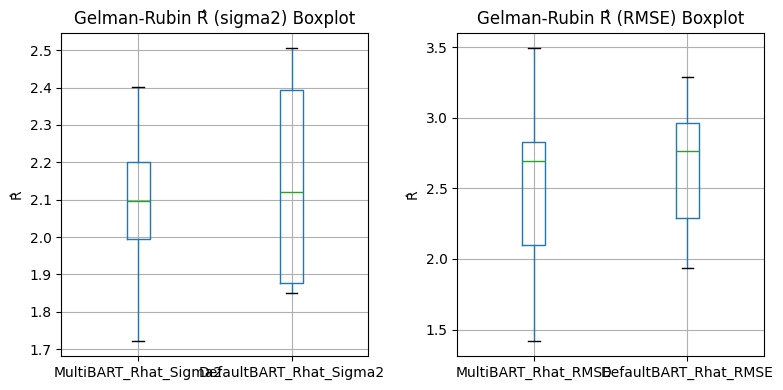

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-08 00:45:24,304:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 00:45:26,274:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 00:45:26,595:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
      bart_mtmh      bart       btz        rf       xgb
0      0.262344  0.284570  0.502771  0.320179  0.393333
1      0.273628  0.317504  0.587879  0.324135  0.380229
2      0.287757  0.305482  0.473742  0.315815  0.403324
3      0.248233  0.308261  0.513579  0.316075  0.370663
4      0.261837  0.309595  0.518268  0.327134  0.387812
5      0.274683  0.313152  0.538617  0.317333  0.393534
6      0.278297  0.317520  0.550138  0.325096  0.399358
7      0.287779  0.318653  0.557451  0.341911  0.392816
8      0.269429  0.310957  0.537388  0.316806  0.396447
9      0.280402  0.328714  0.523443  0.306817  0.376068
mean   0.272439  0.311441  0.530328  0.321130  0.389359
std    0.012398  0.011539  0.031611  0.009341  0.010553



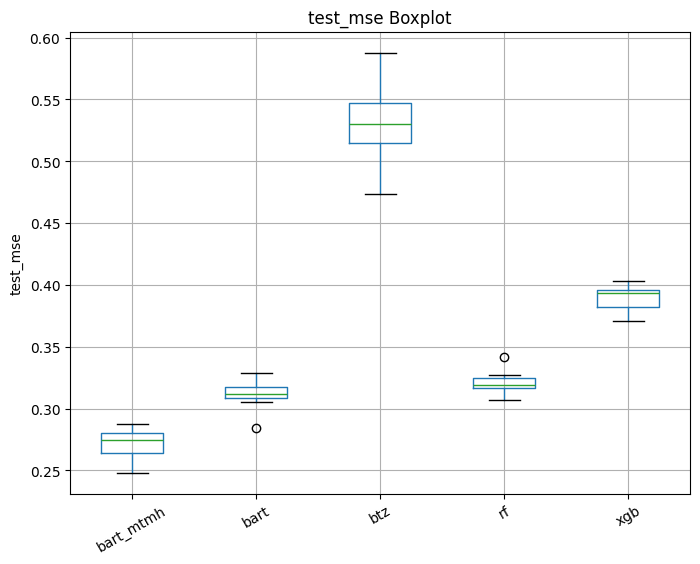

train_mse:
      bart_mtmh      bart       btz        rf       xgb
0      0.219502  0.254832  0.467221  0.069740  0.345322
1      0.208797  0.273372  0.593186  0.068608  0.345310
2      0.225187  0.257998  0.441166  0.066271  0.345250
3      0.213777  0.284525  0.507466  0.071277  0.346881
4      0.208547  0.277216  0.504763  0.066361  0.348377
5      0.206000  0.280071  0.513452  0.068667  0.347502
6      0.212529  0.278540  0.519265  0.068808  0.345989
7      0.222100  0.272566  0.539573  0.070486  0.345210
8      0.217021  0.263111  0.516376  0.068421  0.347493
9      0.218826  0.286198  0.508065  0.069748  0.347811
mean   0.215229  0.272843  0.511053  0.068839  0.346515
std    0.006337  0.010845  0.040177  0.001608  0.001232



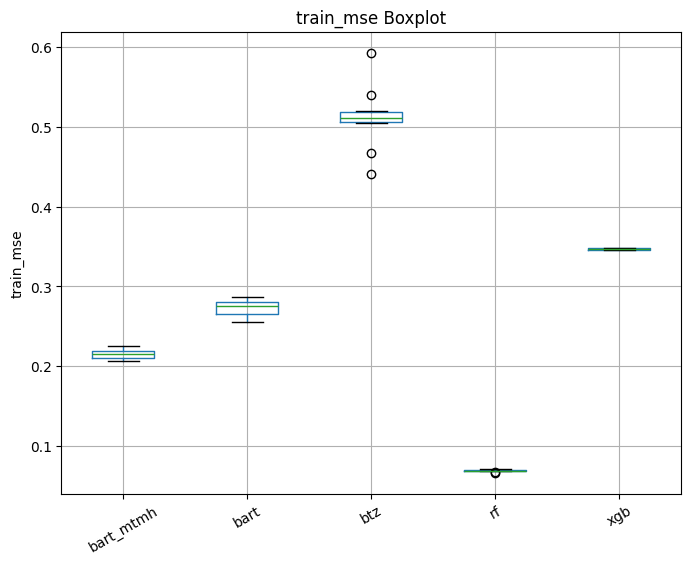

pi_length:
      bart_mtmh      bart       btz
0      1.920589  2.048584  2.830532
1      1.867497  2.110019  3.159405
2      1.941428  2.076764  2.786565
3      1.879096  2.192218  2.961571
4      1.856142  2.141795  2.941249
5      1.854743  2.164703  2.950895
6      1.874510  2.140447  2.964662
7      1.919130  2.122292  2.971516
8      1.902583  2.081911  2.937842
9      1.907261  2.175780  3.039266
mean   1.892298  2.125451  2.954350
std    0.029976  0.046484  0.102008



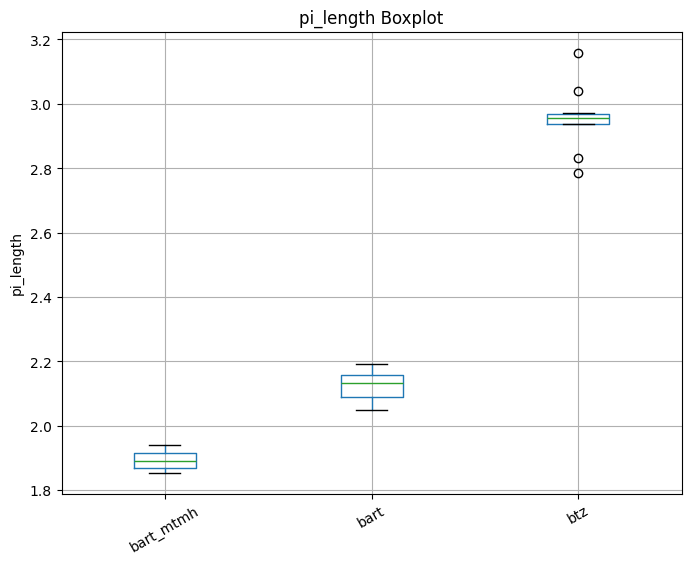

coverage:
      bart_mtmh      bart       btz
0      0.936240  0.938372  0.946318
1      0.931202  0.938372  0.947674
2      0.934496  0.939535  0.947674
3      0.942829  0.943605  0.950969
4      0.937597  0.944767  0.952519
5      0.930426  0.938178  0.944574
6      0.933721  0.940504  0.943798
7      0.931008  0.935078  0.944380
8      0.933721  0.938760  0.942248
9      0.933527  0.940504  0.949225
mean   0.934477  0.939767  0.946938
std    0.003709  0.002795  0.003301



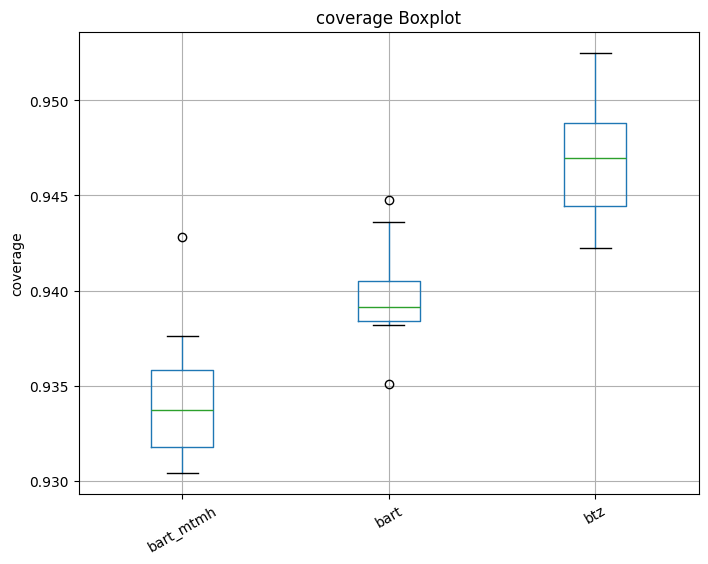

train_time:
      bart_mtmh      bart        btz        rf       xgb
0     45.190732  4.750991  18.576827  1.115968  0.093865
1     54.402891  7.989701  18.748848  0.957901  0.091357
2     73.868402  5.905713  18.205597  1.097168  0.089040
3     52.910192  6.035924  18.008430  0.964357  0.092658
4     39.442959  5.210781  17.841028  0.974899  0.097345
5     62.482360  6.299113  18.663185  0.776169  0.066162
6     61.588911  6.639839  18.569669  1.033333  0.383103
7     40.926336  5.726683  17.708111  0.772201  0.066208
8     41.863548  5.111823  18.488964  0.958046  0.086343
9     61.926260  5.989829  17.705862  0.998672  0.096111
mean  53.460259  5.966040  18.251652  0.964871  0.116219
std   11.514641  0.913052   0.408652  0.115031  0.094457



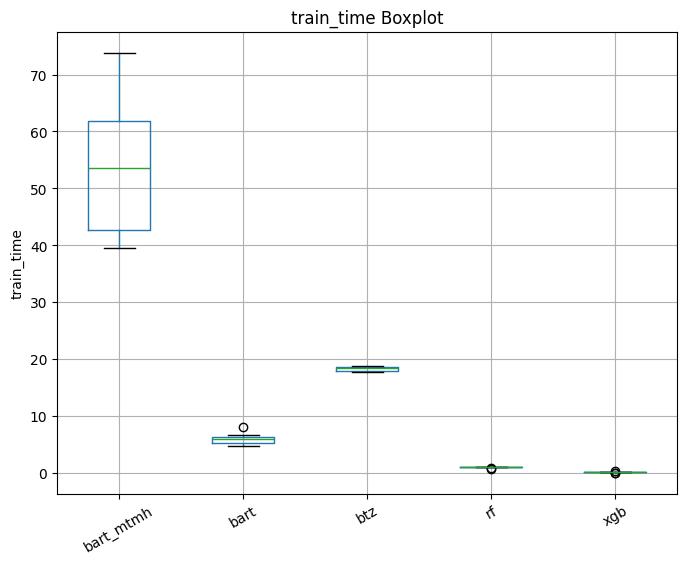

In [13]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=nskip, n_post=ndpost, n_trees=n_trees, n_jobs=-2)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [14]:
for k, v in mse_results.items():
    csv_name = f"results/real3_CalHousing_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [15]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real3_CalHousing_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1, 5, 10, 50, 100],
    n_runs=10, n_chains=4,
    ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real3_CalHousing_tries.csv", index=False)

In [16]:
import pandas as pd
df = pd.read_csv("results/real3_CalHousing_tries.csv")
print(df)

   multi_tries  Rhat_Sigma2  Rhat_RMSE  Test_MSE  Coverage  Train_Time
0            1     2.174975   2.464461  0.319359  0.940891   12.231635
1            5     2.144679   2.456061  0.278402  0.937519   25.779220
2           10     2.073416   2.486285  0.278429  0.934147   59.029271
3           50     1.872343   2.079195  0.257730  0.926880  209.271673
4          100     2.052909   1.957921  0.257961  0.922849  792.997274
